<a href="https://colab.research.google.com/github/BASSI101/SakshamMishra_JioInstitute/blob/main/Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

None

<ipython-input-4-20fec3a0de1f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values, palette='coolwarm')


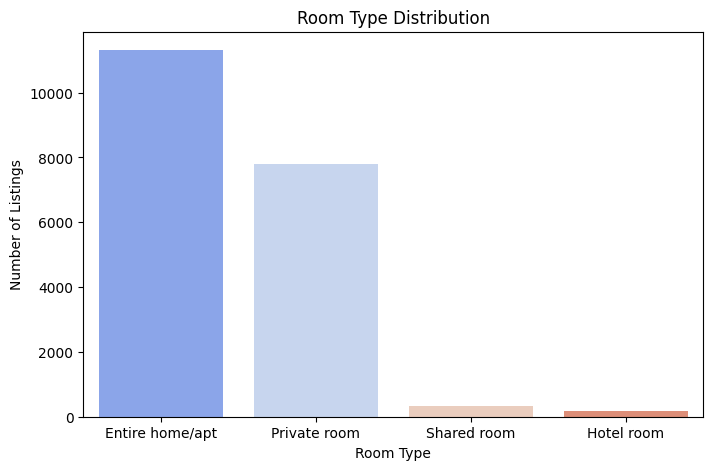

<ipython-input-4-20fec3a0de1f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neighb_counts.index[:20], x=neighb_counts.values[:20], palette='viridis')


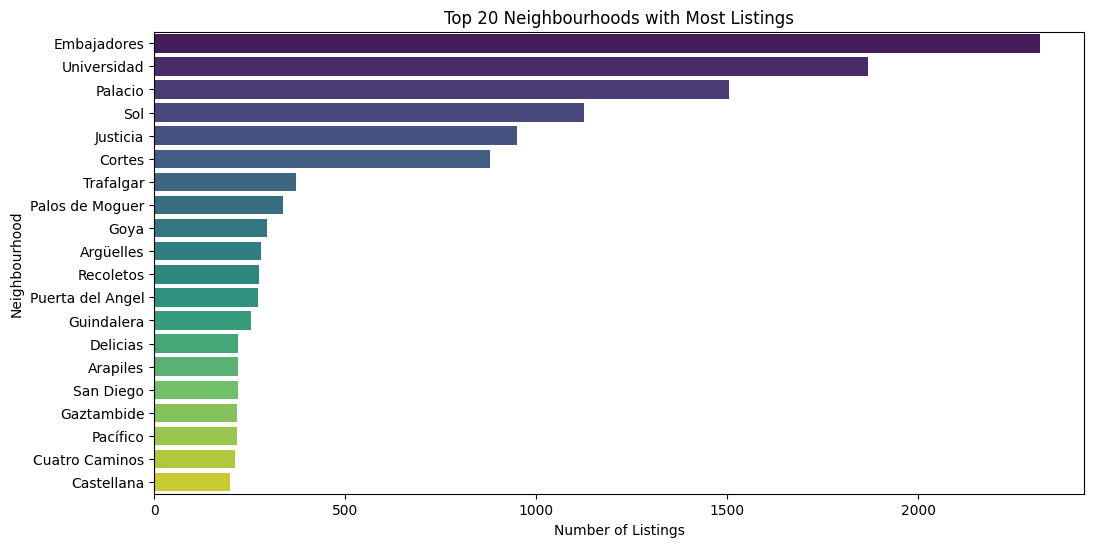

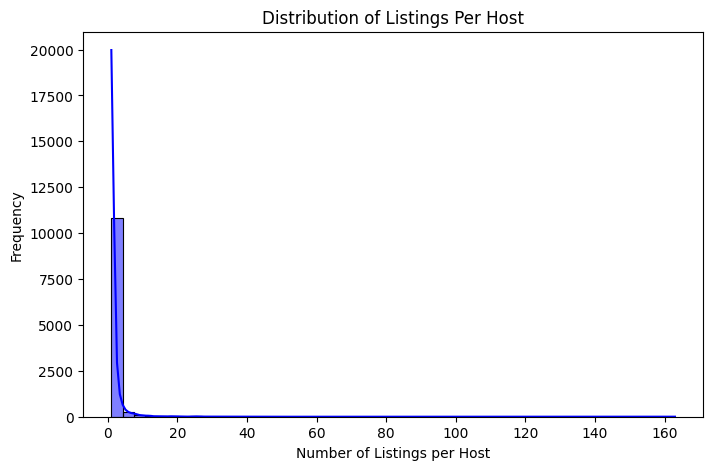

Number of hosts with multiple listings: 2480


<ipython-input-4-20fec3a0de1f>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Spanish', 'English'], y=prices_by_lang.values, palette='coolwarm')


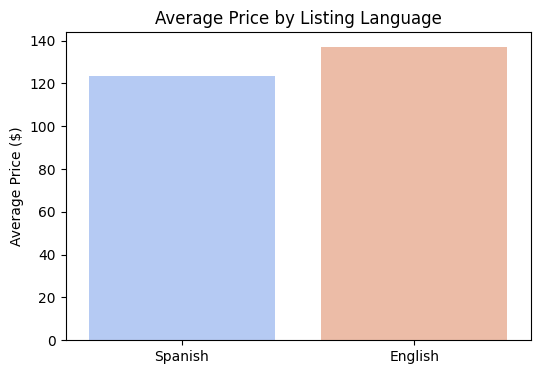

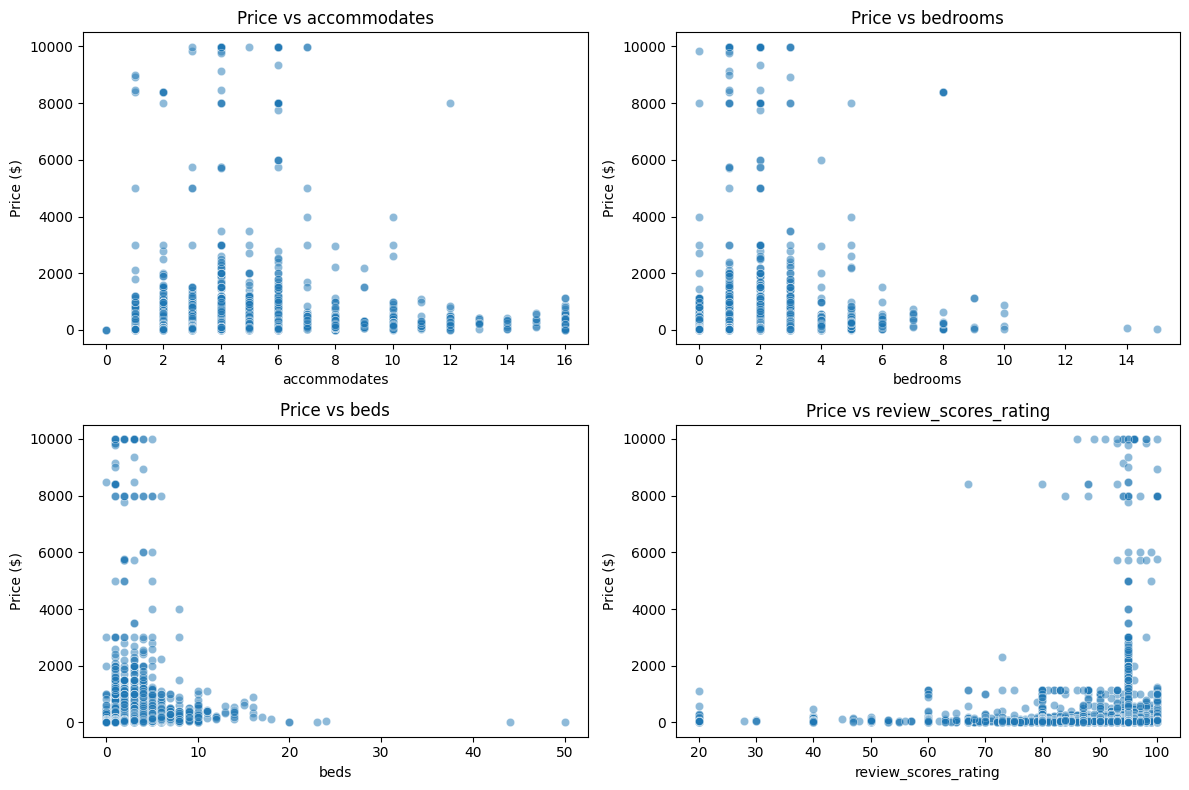

R² Score: 0.02


<ipython-input-4-20fec3a0de1f>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
file_path = 'listings_detailed.csv'  # Update file name if necessary
df = pd.read_csv(file_path)

# Display basic info
display(df.head())
display(df.info())

# Data Preprocessing
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Convert price to numeric

# Handle missing values
df.fillna({'bedrooms': 0, 'bathrooms_text': 'Unknown', 'beds': 0, 'review_scores_rating': df['review_scores_rating'].median(), 'price': df['price'].median()}, inplace=True)

### Q1: Is Airbnb still offering shared/private rooms primarily?
room_type_distribution = df['room_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values, palette='coolwarm')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

### Q2: Are listings evenly distributed across all neighborhoods?
plt.figure(figsize=(12, 6))
neighb_counts = df['neighbourhood_cleansed'].value_counts()
sns.barplot(y=neighb_counts.index[:20], x=neighb_counts.values[:20], palette='viridis')
plt.title('Top 20 Neighbourhoods with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

### Q3: Are properties owned by private users or multiple listings by same host?
host_listings = df.groupby('host_id')['id'].count()
plt.figure(figsize=(8, 5))
sns.histplot(host_listings, bins=50, kde=True, color='blue')
plt.title('Distribution of Listings Per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Frequency')
plt.show()

# Finding multi-property hosts
multi_property_hosts = (host_listings > 1).sum()
print(f"Number of hosts with multiple listings: {multi_property_hosts}")

### Q4: Are prices inflated for tourists (English vs Spanish descriptions)?
df['english_desc'] = df['description'].apply(lambda x: isinstance(x, str) and any(word in x.lower() for word in ['room', 'apartment', 'stay', 'welcome', 'city', 'night']))
prices_by_lang = df.groupby('english_desc')['price'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=['Spanish', 'English'], y=prices_by_lang.values, palette='coolwarm')
plt.title('Average Price by Listing Language')
plt.ylabel('Average Price ($)')
plt.show()

### Q5: Effect of various factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price ($)')
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

### Regression Analysis for Impact on Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting relevant features for regression
X = df[['accommodates', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']
X.fillna(0, inplace=True)
y.fillna(y.median(), inplace=True)  # Ensuring no NaN values in y

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

None

<ipython-input-5-17b128eac474>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values, palette='coolwarm')


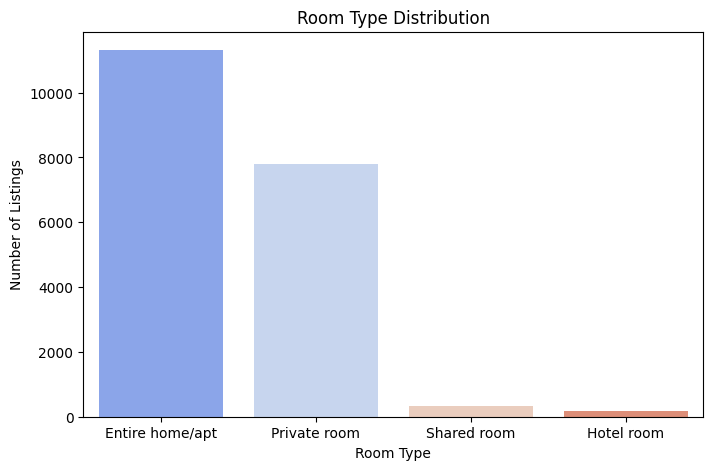

<ipython-input-5-17b128eac474>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neighb_counts.index[:20], x=neighb_counts.values[:20], palette='viridis')


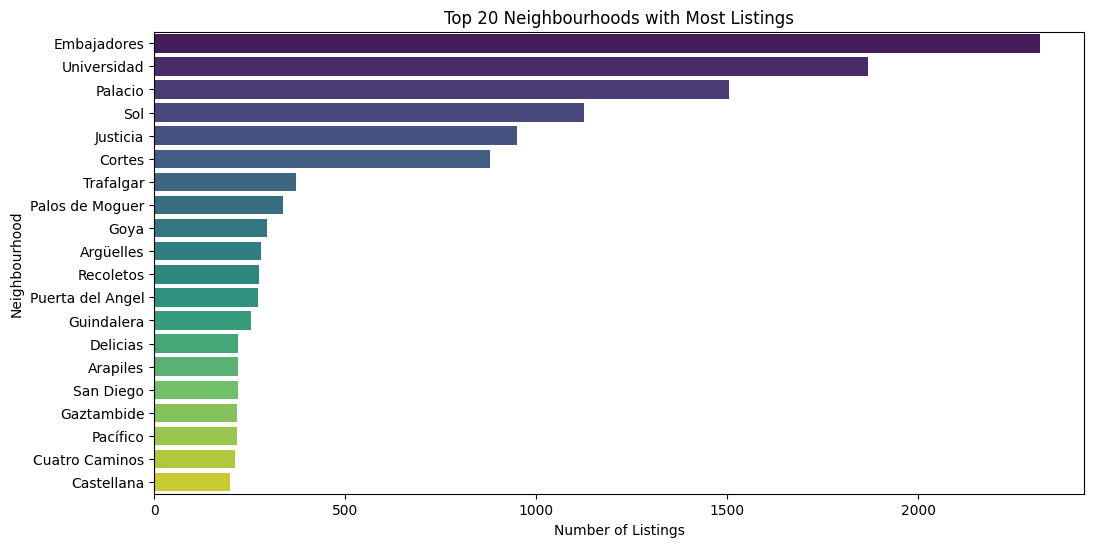

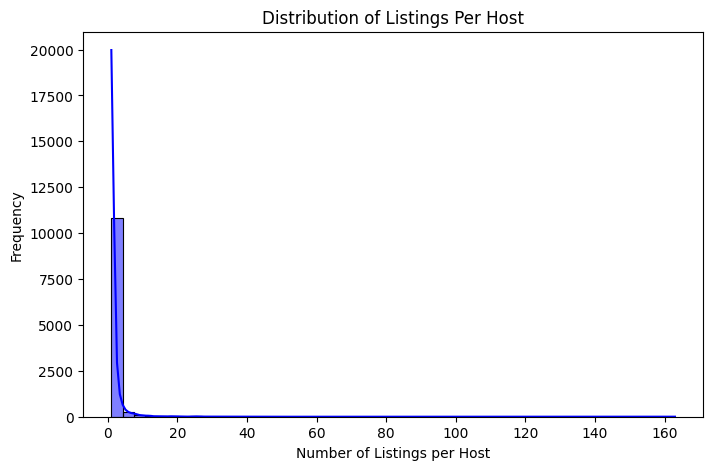

Number of hosts with multiple listings: 2480


<ipython-input-5-17b128eac474>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Spanish', 'English'], y=prices_by_lang.values, palette='coolwarm')


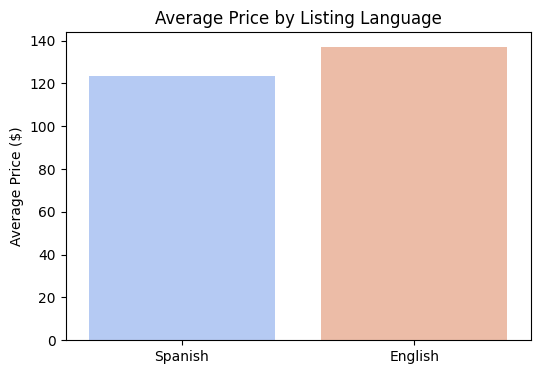

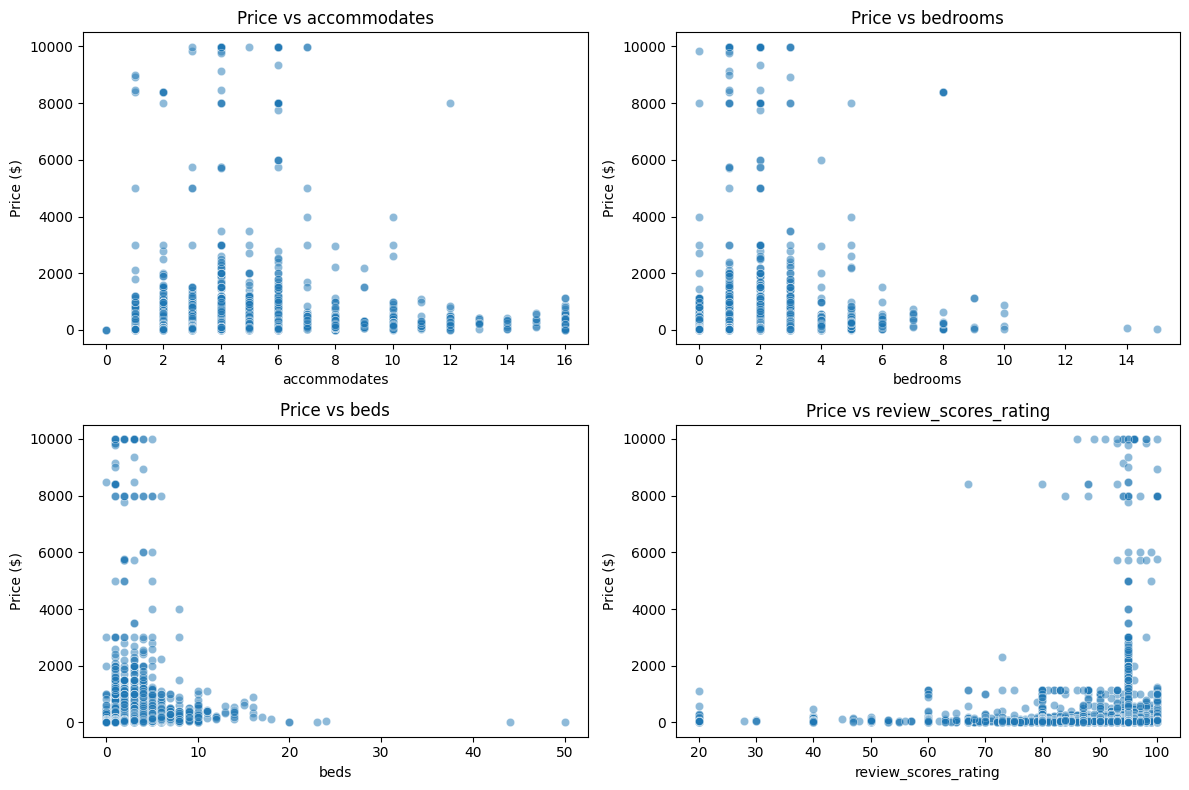

R² Score: 0.02
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           5.06e-92
Time:                        06:23:12   Log-Likelihood:            -1.4891e+05
No. Observations:               19618   AIC:                         2.978e+05
Df Residuals:                   19613   BIC:                         2.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const            

<ipython-input-5-17b128eac474>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from wordcloud import WordCloud

# Load dataset
file_path = 'listings_detailed.csv'  # Update file name if necessary
df = pd.read_csv(file_path)

# Display basic info
display(df.head())
display(df.info())

# Data Preprocessing
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Convert price to numeric

# Handle missing values
df.fillna({'bedrooms': 0, 'bathrooms_text': 'Unknown', 'beds': 0, 'review_scores_rating': df['review_scores_rating'].median(), 'price': df['price'].median()}, inplace=True)

### Q1: Is Airbnb still offering shared/private rooms primarily?
room_type_distribution = df['room_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values, palette='coolwarm')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

### Q2: Are listings evenly distributed across all neighborhoods?
plt.figure(figsize=(12, 6))
neighb_counts = df['neighbourhood_cleansed'].value_counts()
sns.barplot(y=neighb_counts.index[:20], x=neighb_counts.values[:20], palette='viridis')
plt.title('Top 20 Neighbourhoods with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

### Q3: Are properties owned by private users or multiple listings by same host?
host_listings = df.groupby('host_id')['id'].count()
plt.figure(figsize=(8, 5))
sns.histplot(host_listings, bins=50, kde=True, color='blue')
plt.title('Distribution of Listings Per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Frequency')
plt.show()

# Finding multi-property hosts
multi_property_hosts = (host_listings > 1).sum()
print(f"Number of hosts with multiple listings: {multi_property_hosts}")

### Q4: Are prices inflated for tourists (English vs Spanish descriptions)?
df['english_desc'] = df['description'].apply(lambda x: isinstance(x, str) and any(word in x.lower() for word in ['room', 'apartment', 'stay', 'welcome', 'city', 'night']))
prices_by_lang = df.groupby('english_desc')['price'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=['Spanish', 'English'], y=prices_by_lang.values, palette='coolwarm')
plt.title('Average Price by Listing Language')
plt.ylabel('Average Price ($)')
plt.show()

### Q5: Effect of various factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price ($)')
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

### Regression Analysis for Impact on Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting relevant features for regression
X = df[['accommodates', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']
X.fillna(0, inplace=True)
y.fillna(y.median(), inplace=True)  # Ensuring no NaN values in y

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

### Printing Regression Table
X_const = sm.add_constant(X)  # Adding constant term for intercept
model_ols = sm.OLS(y, X_const).fit()
print(model_ols.summary())
